<a href="https://colab.research.google.com/github/Farheena12/Assignment-with-Sql/blob/main/Assignment.Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Screening Test

Screening Test

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

In [6]:
data = pd.read_csv('/content/Weather_data.csv')

In [7]:
data.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [11]:
data[' _conds'].value_counts()

Haze                             46887
Smoke                            20334
Mist                              8999
Clear                             3129
Widespread Dust                   2830
Fog                               2541
Scattered Clouds                  2197
Partly Cloudy                     2064
Shallow Fog                       1859
Mostly Cloudy                     1520
Light Rain                        1297
Partial Fog                        962
Patches of Fog                     816
Thunderstorms and Rain             471
Light Drizzle                      410
Heavy Fog                          407
Rain                               394
Unknown                            378
Blowing Sand                       358
Overcast                           313
Thunderstorm                       190
Light Thunderstorms and Rain       170
Drizzle                            111
Light Thunderstorm                  63
Light Fog                           52
Heavy Rain               

Part 1: An analysis of Weather in Delhi

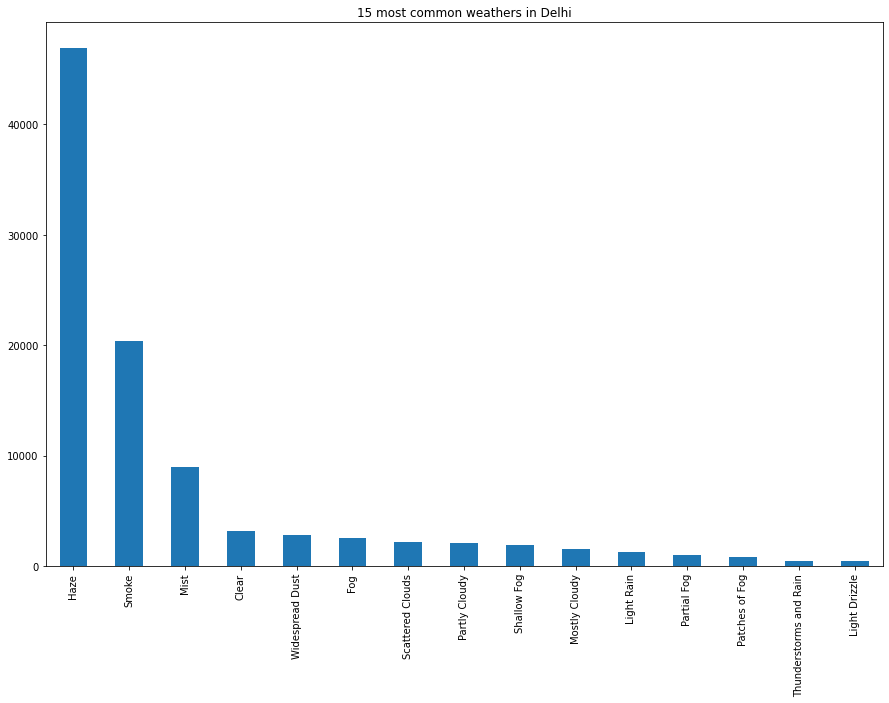

In [13]:
plt.figure(figsize=(15,10))
data[' _conds'].value_counts().head(15).plot(kind='bar')

plt.title('15 most common weathers in Delhi')
plt.show()

From above plot,the Haze and Smoke are the most common weathers in Delhi

[]

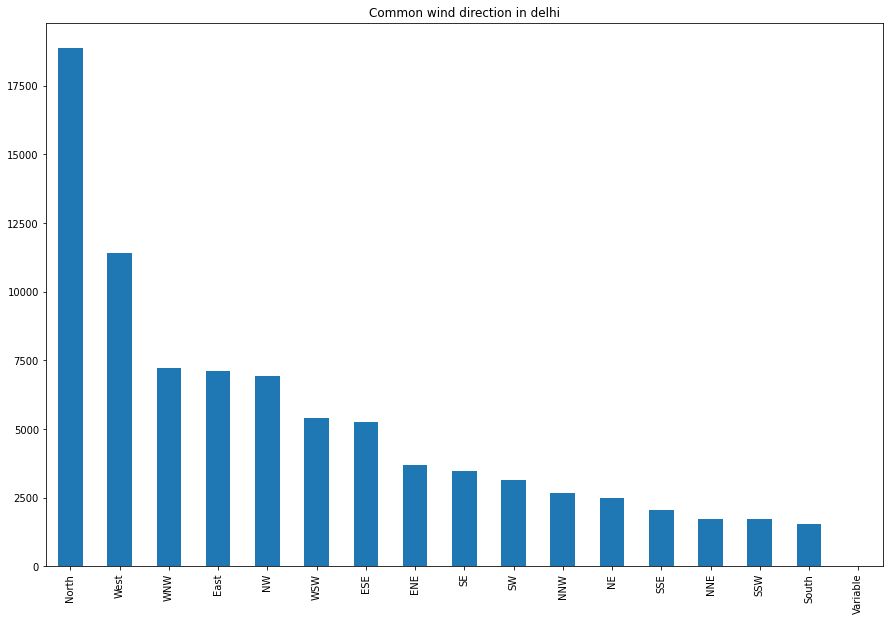

In [14]:
plt.figure(figsize=(15, 10))
plt.title("Common wind direction in delhi")
data[' _wdire'].value_counts().plot(kind="bar")
plt.plot()

North and West are the most common wind directions in Delhi.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


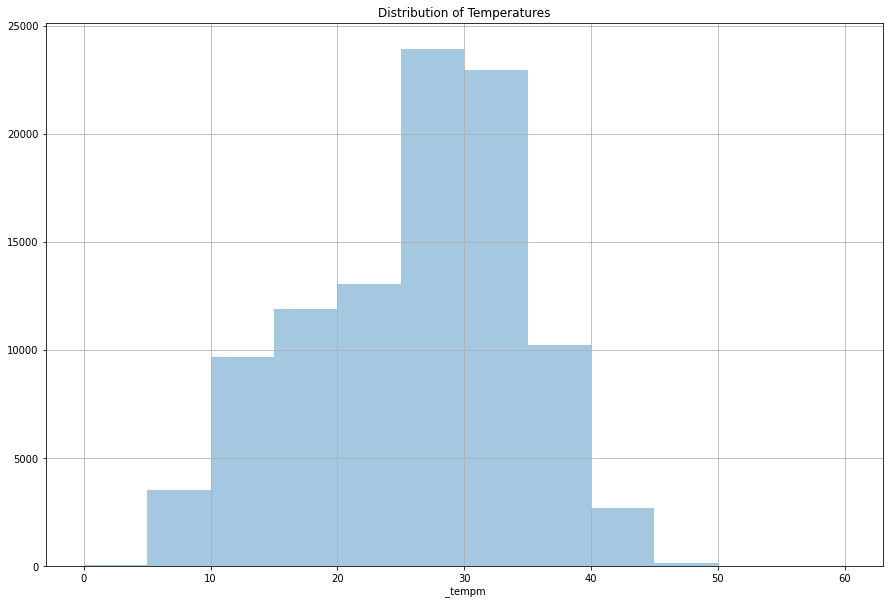

In [18]:
plt.figure(figsize=(15, 10))
sns.distplot(data[' _tempm'],bins=[i for i in range(0,61,5)], kde=False)
plt.title("Distribution of Temperatures")
plt.grid()
plt.show()

Most common temperature scale in Delhi is from 25 to 35 degree.

In [19]:
data['datetime_utc'] = pd.to_datetime(data['datetime_utc'])

In [20]:
data['datetime_utc']

0       1996-11-01 11:00:00
1       1996-11-01 12:00:00
2       1996-11-01 13:00:00
3       1996-11-01 14:00:00
4       1996-11-01 16:00:00
                ...        
98908   2016-11-30 12:30:00
98909   2016-11-30 13:00:00
98910   2016-11-30 15:00:00
98911   2016-11-30 18:00:00
98912   2016-11-30 21:00:00
Name: datetime_utc, Length: 98913, dtype: datetime64[ns]

In [21]:
data.isna().sum()

datetime_utc        0
 _conds            68
 _dewptm          619
 _fog               0
 _hail              0
 _heatindexm    69802
 _hum             753
 _precipm       98913
 _pressurem       231
 _rain              0
 _snow              0
 _tempm           669
 _thunder           0
 _tornado           0
 _vism           4416
 _wdird         14380
 _wdire         14380
 _wgustm        97850
 _windchillm    98340
 _wspdm          2353
dtype: int64

In [22]:
# imputing the missing value in temperatre feature with mean.
data[' _tempm'].fillna(data[' _tempm'].mean(), inplace=True)

In [24]:
data[' _tempm'].isna().sum()

0

In [26]:
# a function to extract year part from the whole date
def get_year(x):
  return x[0:4]

In [27]:
# a function to extract month part from the whole date
def get_month(x):
  return x[5:7]

In [28]:
data['year'] = data['datetime_utc'].apply(lambda x: get_year(str(x)))
data['month'] = data['datetime_utc'].apply(lambda x: get_month(str(x)))

In [30]:
data['year']

0        1996
1        1996
2        1996
3        1996
4        1996
         ... 
98908    2016
98909    2016
98910    2016
98911    2016
98912    2016
Name: year, Length: 98913, dtype: object

In [32]:
temp_year = pd.crosstab(data['year'], data['month'], values=data[' _tempm'], aggfunc='mean')

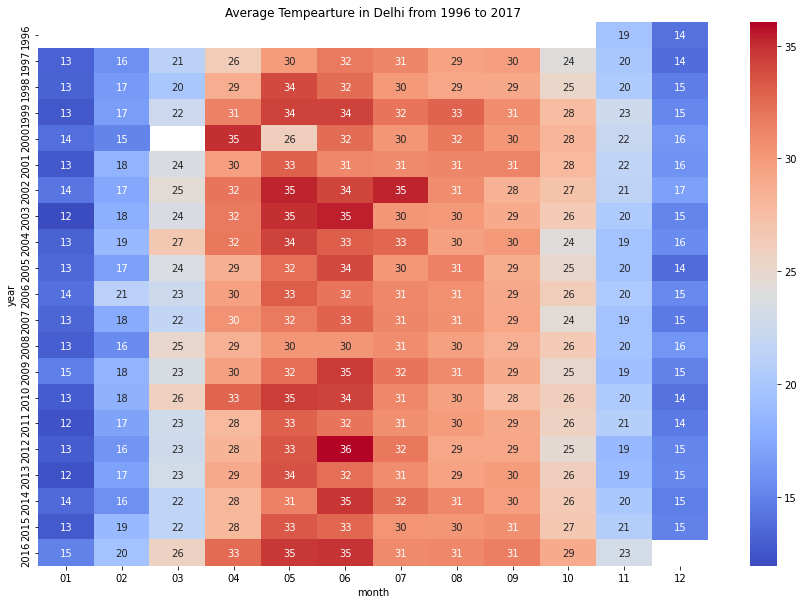

In [33]:
plt.figure(figsize=(15, 10))
sns.heatmap(temp_year, cmap='coolwarm', annot=True)
plt.title("Average Tempearture in Delhi from 1996 to 2017")
plt.show()

In [34]:
data[' _hum'].isna().sum()

753

In [35]:
# imputing missing values in _hum feature with mean
data[' _hum'].fillna(data[' _hum'].mean(), inplace=True)

In [36]:
humidity_year = pd.crosstab(data['year'], data['month'], values=data[' _hum'], aggfunc='mean')

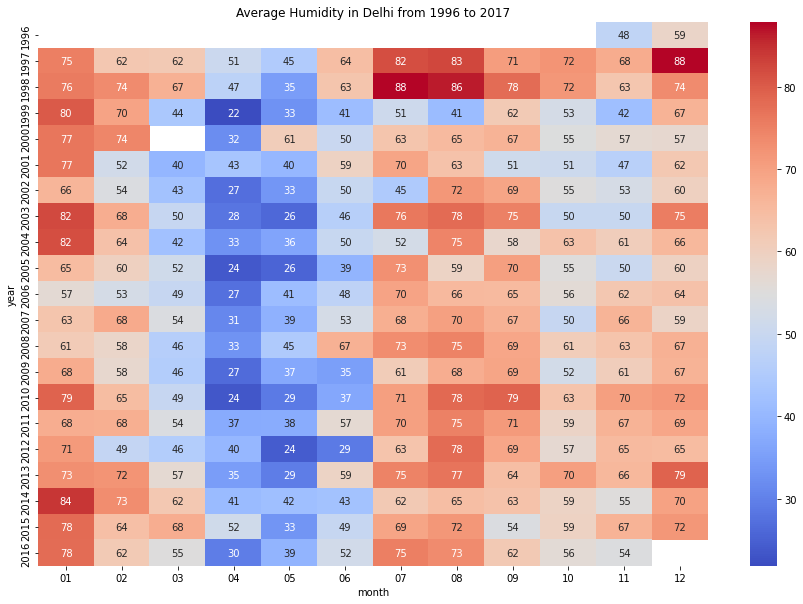

In [37]:
plt.figure(figsize=(15, 10))
sns.heatmap(humidity_year, cmap='coolwarm', annot=True)
plt.title("Average Humidity in Delhi from 1996 to 2017")
plt.show()

                Time Series Forecasting

In [38]:
# taking only temperature feature as values and datetime feature as index in the dataframe for time series forecasting of temperature
data_weather = pd.DataFrame(list(data[' _tempm']), index=data['datetime_utc'], columns=['temp'])

In [39]:
data_weather

,temp
datetime_utc,
1996-11-01 11:00:00,30.0
1996-11-01 12:00:00,28.0
1996-11-01 13:00:00,24.0
1996-11-01 14:00:00,24.0
1996-11-01 16:00:00,23.0
...,...
2016-11-30 12:30:00,21.0
2016-11-30 13:00:00,19.0
2016-11-30 15:00:00,17.0


In [41]:
data_weather = data_weather.resample('D').mean()

In [42]:
data_weather.temp.isna().sum()

141

In [44]:
data_weather.fillna(data_weather['temp'].mean(), inplace=True)

In [45]:
data_weather.temp.isna().sum()

0

In [46]:
data_weather.shape

(7335, 1)

In [47]:
data_weather

,temp
datetime_utc,
1996-11-01,22.333333
1996-11-02,22.916667
1996-11-03,21.791667
1996-11-04,22.722222
1996-11-05,27.800000
...,...
2016-11-26,24.294118
2016-11-27,23.636364
2016-11-28,22.454545


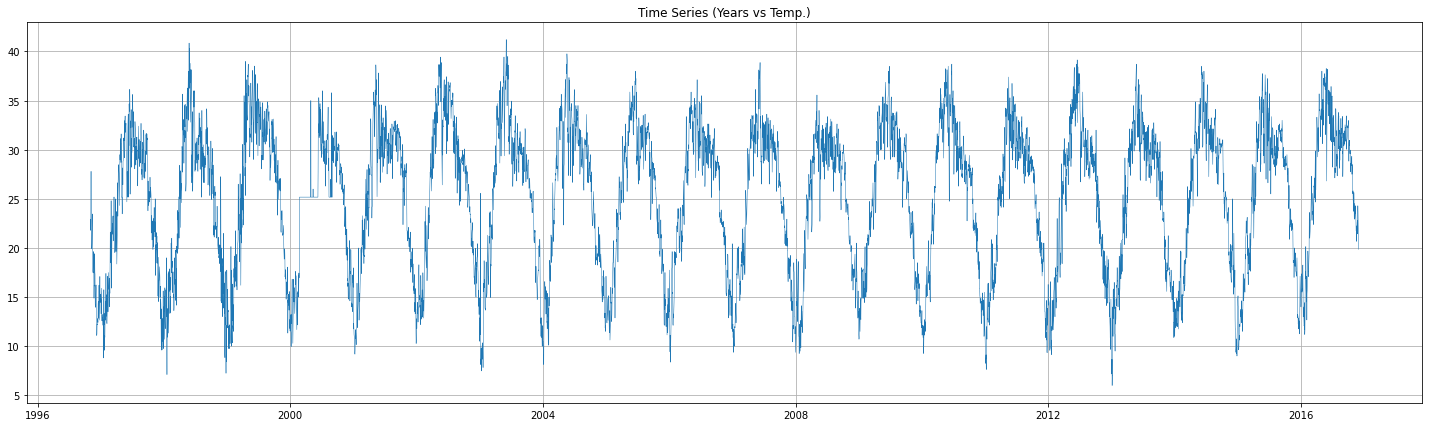

In [48]:
plt.figure(figsize=(25, 7))
plt.plot(data_weather, linewidth=.5)
plt.grid()
plt.title("Time Series (Years vs Temp.)")
plt.show()

In [50]:
# Scaling data to get rid of outliers
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(-1,1))
data_scaled = scalar.fit_transform(data_weather)

In [51]:
data_scaled

array([[-0.07224714],
       [-0.0391131 ],
       [-0.10301445],
       ...,
       [-0.06536214],
       [-0.11327022],
       [-0.21219211]])

In [52]:
data_scaled.shape

(7335, 1)

In [53]:
timestep = 30
X= []
Y=[]
for i in range(len(data_scaled)- (timestep)):
    X.append(data_scaled[i:i+timestep])
    Y.append(data_scaled[i+timestep])

In [54]:
X=np.asanyarray(X)
Y=np.asanyarray(Y)

In [55]:
k = 7300
Xtrain = X[:k,:,:]
Xtest = X[k:,:,:]    
Ytrain = Y[:k]    
Ytest= Y[k:] 

In [56]:
X.shape

(7305, 30, 1)

In [57]:
Xtrain.shape

(7300, 30, 1)

In [58]:
Xtest.shape

(5, 30, 1)

In [59]:
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.models import Sequential

In [60]:
from tensorflow.keras.layers import Bidirectional, Dropout

In [61]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(30,1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(30))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(Bidirectional(LSTM(128, activation='relu')))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
history = model.fit(Xtrain,Ytrain,epochs=300, verbose=1 )

Epoch 1/300
229/229 [==============================] - 76s 295ms/step - loss: 0.0194
Epoch 2/300
229/229 [==============================] - 67s 295ms/step - loss: 0.0116
Epoch 3/300
229/229 [==============================] - 68s 295ms/step - loss: 0.0110
Epoch 4/300
229/229 [==============================] - 68s 295ms/step - loss: 0.0108
Epoch 5/300
229/229 [==============================] - 67s 294ms/step - loss: 0.0103
Epoch 6/300
229/229 [==============================] - 67s 294ms/step - loss: 0.0107
Epoch 7/300
229/229 [==============================] - 68s 295ms/step - loss: 0.0101
Epoch 8/300
229/229 [==============================] - 67s 293ms/step - loss: 0.0099
Epoch 9/300
229/229 [==============================] - 67s 295ms/step - loss: 0.0101
Epoch 10/300
229/229 [==============================] - 68s 296ms/step - loss: 0.0099
Epoch 11/300
229/229 [==============================] - 68s 297ms/step - loss: 0.0096
Epoch 12/300
229/229 [==============================] - 68s 297

In [75]:
model.save("./regressor.hdf5")

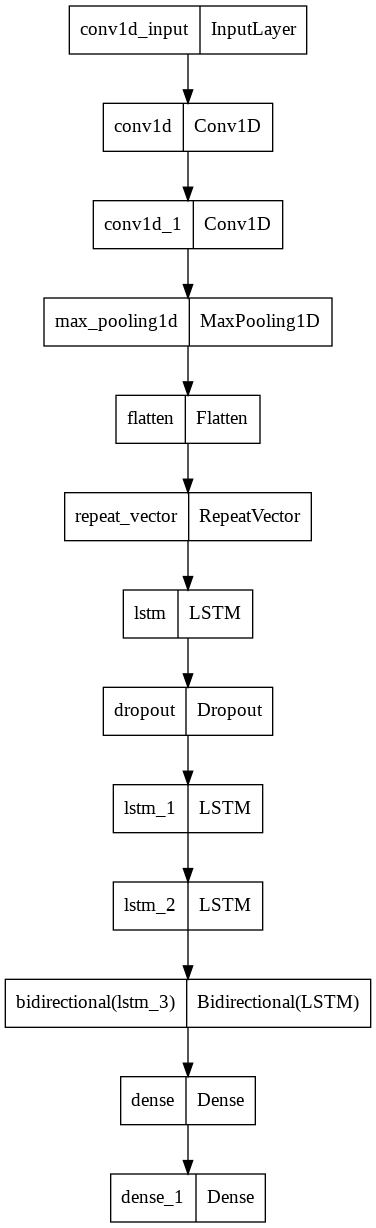

In [76]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [77]:
predict = model.predict(Xtest)

In [78]:
predict = scalar.inverse_transform(predict)

In [79]:
Ytesting = scalar.inverse_transform(Ytest)

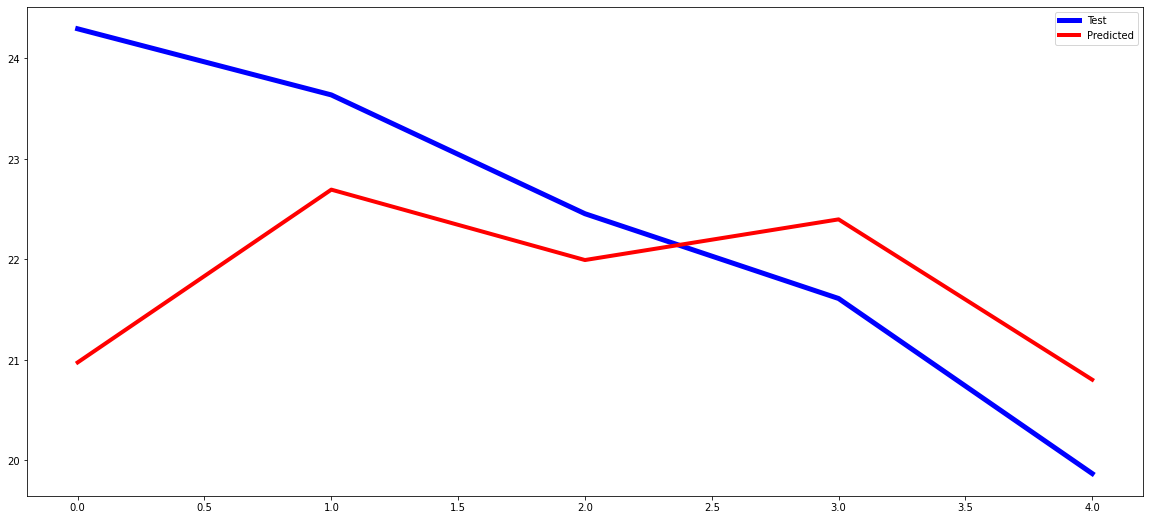

In [80]:
plt.figure(figsize=(20,9))
plt.plot(Ytesting , 'blue', linewidth=5)
plt.plot(predict,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.show()

In [81]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Ytesting, predict)

2.721364576546561